In [41]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from texture import * 

# Question 1

## The function extract_edges(img) takes as input an image (in BGR format) and returns a binary image containing the edges of the original image.

#### Here's a brief description of the steps performed by the function:

- Convert the input image to grayscale using cv2.cvtColor() function
- Apply thresholding to the grayscale image using cv2.threshold() function. This converts the image into a binary image.
- Create a structuring element for morphological operations using np.ones() function. In this case, a 3x3 matrix is created.
- Erode the binary image using cv2.erode() function with the kernel created in step 3 to remove small white noise pixels.
- Dilate the eroded image using cv2.dilate() function with the same kernel to fill gaps between edges and make them more continuous.
- Subtract the dilated image from the original binary image to obtain the final edge map.
##### The resulting edges image contains only the edges of the original image, which can be used for further analysis or processing.

In [2]:
def extract_edges(img):
    
    # Convert image to grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Apply thresholding to convert image into binary
    _, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

    # Create structuring element for morphological operations
    kernel = np.ones((3,3),np.uint8)
    
    # Erode the binary image
    eroded = cv.erode(thresh,kernel,iterations = 2)
    
    # Dilate the eroded image
    dilated = cv.dilate(eroded,kernel,iterations = 1)
    
    # Subtract the dilated image from the original binary image to obtain edges
    edges = thresh - dilated
    
    return edges

### Here's how it works:

- The input image is first converted to grayscale using the cvtColor() function from the OpenCV library.

- Thresholding is then applied to convert the grayscale image into a binary image. Thresholding is a technique used to separate pixels into foreground (object) and background based on their pixel intensity.

- Next, the complement of the binary image is computed using the bitwise_not() function from the OpenCV library. This is done because we will be performing morphological operations on the image, and these operations work better on the complement of the image.

- A structuring element (kernel) is created using the ones() function from numpy. This kernel will be used for morphological operations.

- The binary image is dilated using the dilate() function from the OpenCV library. Dilation is a morphological operation that adds pixels to the boundaries of objects in an image.

- The dilated image is then eroded using the erode() function from the OpenCV library. Erosion is a morphological operation that removes pixels from the boundaries of objects in an image.

- The bitwise_and() function is then used to combine the eroded image with the complement of the binary image. This effectively fills any holes that may have been present in the original binary image.

- Finally, the filled image is returned as output.

In [3]:
def fill_holes(img):
    
    # Convert image to grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Apply thresholding to convert image into binary
    _, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    
    # compute the complement of the image
    complement = cv.bitwise_not(thresh)
    
    # Create structuring element for morphological operations
    kernel = np.ones((3,3),np.uint8)
    
    # Dilate the binary image
    dilated = cv.dilate(thresh,kernel,iterations = 1)
    
    # Erode the dilated image
    eroded = cv.erode(dilated,kernel,iterations = 1)
    
    
    filled = cv.bitwise_and(eroded, complement)
    
    return filled


In [4]:
gray_img1 = cv.imread("1.jpeg")
gray_img2 = cv.imread("2.png")

In this i extracted every single edges of both gray scale iamges in the doc

In [5]:
edge_gray2 = extract_edges(gray_img2)
edge_gray1 = extract_edges(gray_img1)

These two are original pictures 

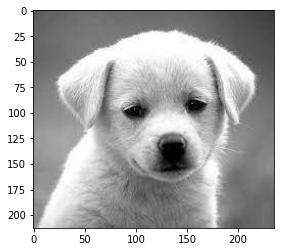

In [6]:
plt.imshow(gray_img1)

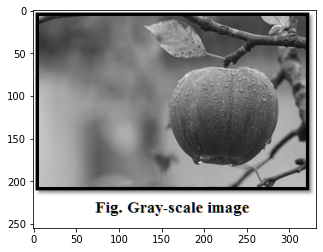

In [7]:
plt.imshow(gray_img2)

These two are extracted edges in these images 

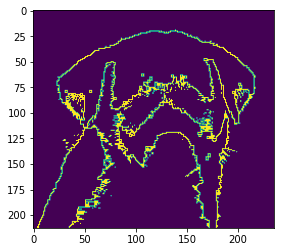

In [8]:
plt.imshow(edge_gray1)

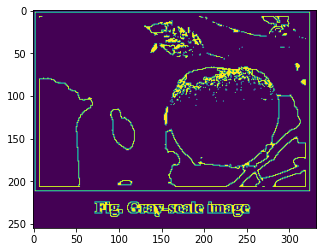

In [9]:
plt.imshow(edge_gray2)

In this part i filled holes that are existed in binary version of gray scale images 

In [10]:
filled_image_gray1 = fill_holes(gray_img1)
filled_image_gray2 = fill_holes(gray_img2)

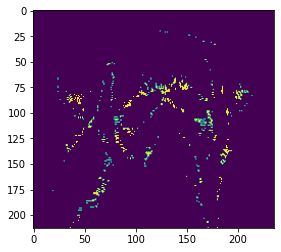

In [11]:
plt.imshow(filled_image_gray1)

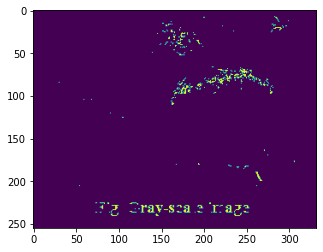

In [12]:
plt.imshow(filled_image_gray2)

In [13]:
binary_1 = cv.imread("1.png")
binary_2 = cv.imread("2 (1).png")

In this part what i did is i read the images and then ploted them for visualization perposes 

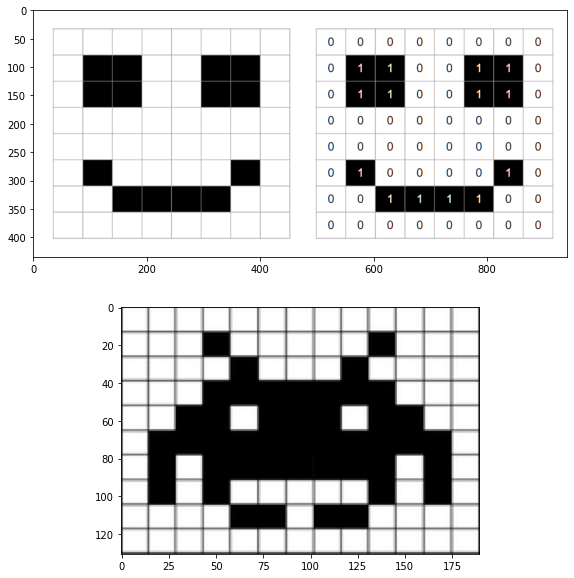

In [14]:
fig, ax = plt.subplots(2,1)
fig.set_figwidth(10)
fig.set_figheight(10)
ax[0].imshow(binary_1)
ax[1].imshow(binary_2)

And then in the next step by using extract_edges() method i could extract edges of these images and then ploted them 

In [15]:
edge_bin1 = extract_edges(binary_1)
edge_bin2 = extract_edges(binary_2)

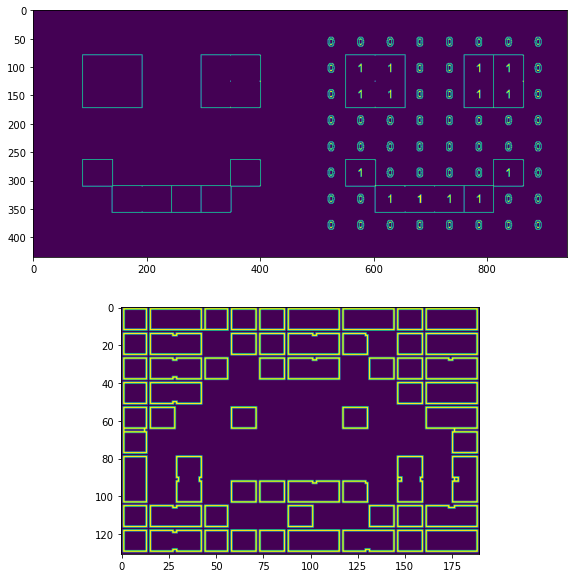

In [16]:
fig, ax = plt.subplots(2,1)
fig.set_figwidth(10)
fig.set_figheight(10)
ax[0].imshow(edge_bin1)
ax[1].imshow(edge_bin2)

In [17]:
filled_image_bin1 = fill_holes(binary_1)
filled_image_bin2 = fill_holes(binary_2)

In this section i tried to use fill_holes() method based on what we've learned in the class and by plotting them we can see the result that almost filled the whole space 

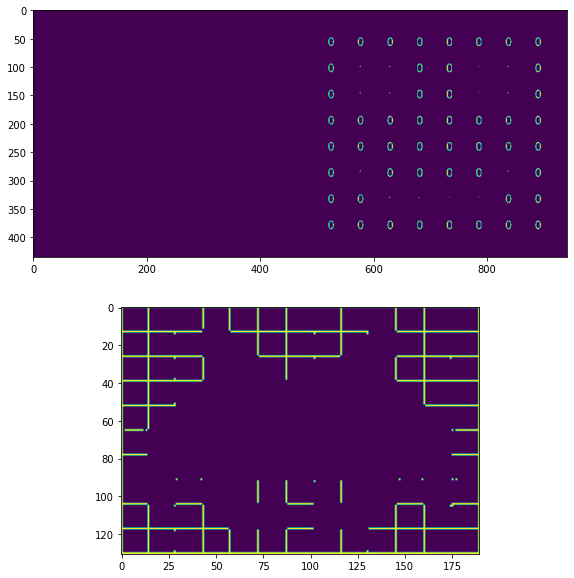

In [18]:
fig, ax = plt.subplots(2,1)
fig.set_figwidth(10)
fig.set_figheight(10)
ax[0].imshow(filled_image_bin1)
ax[1].imshow(filled_image_bin2)

In [20]:
lena = cv.imread("lena.tif")

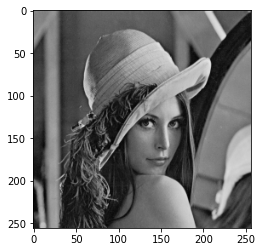

In [21]:
plt.imshow(lena)

Applying edge extraction on lena image by using previous edge extraction approach 


In [22]:
lena_edges = extract_edges(lena)

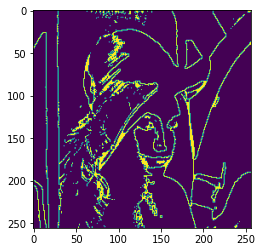

In [23]:
plt.imshow(lena_edges)

Applying Laplacian of Gaussian on lena image down below 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


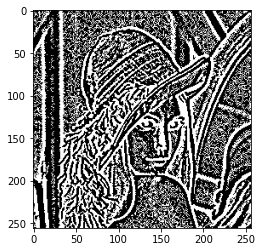

In [24]:
blur_img = cv.GaussianBlur(lena, (5, 5), 0)
log_img = cv.Laplacian(blur_img, cv.CV_64F)
plt.imshow(log_img)

__As a conclusion__ it extracted more features than previous edge extractore but at the same time its more sensitive to noises than the previous approach => if we only wanna see the boundries i dont recommend this LoG approach its because its not capable of extracting usable boundries for human eyes 

# Question 2

In [2]:
first_img = cv.imread("1 (1).png")
second_img = cv.imread("2 (2).png")
third_img = cv.imread("3.png")
forth_img = cv.imread("4.png")

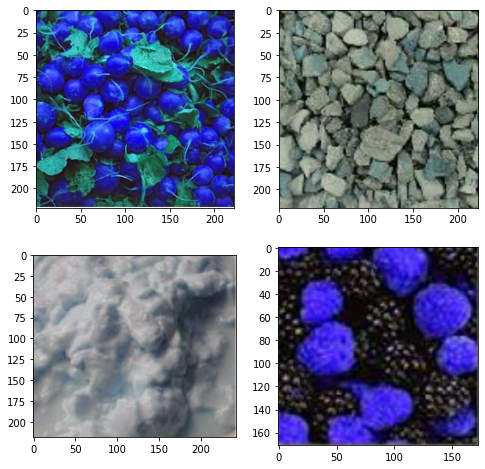

In [3]:
fig, ax = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(8)
ax[0,0].imshow(first_img)
ax[0,1].imshow(second_img)
ax[1,0].imshow(third_img)
ax[1,1].imshow(forth_img)

To do this texture synthesis i used a code in this link : https://github.com/lostmartian/image-quilting-texture-synthesis
So i tried this code on this images and these are the results :

There is some intializations

In [75]:
block_size = 50
overlap_size = block_size//5
num_blocks = 20
tolerance_factor = 0.1

Applying texture synthesis on first image :


In [76]:
img_1 = cv.cvtColor(first_img, cv.COLOR_BGR2RGB)/255.0
H, W = img_1.shape[:2]
H1 = W1 = num_blocks * (block_size - overlap_size)

In [77]:
texFunc = textureMain(img_1, block_size, overlap_size, num_blocks, H, W, H1, W1, tolerance_factor)
texFunc.generateOutputMask()
output_img = texFunc.createTexture()

Progress= 0
Progress= 1
Progress= 2
Progress= 3
Progress= 4
Progress= 5
Progress= 6
Progress= 7
Progress= 8
Progress= 9
Progress= 10
Progress= 11
Progress= 12
Progress= 13
Progress= 14
Progress= 15
Progress= 16
Progress= 17
Progress= 18
Progress= 19


The result of texture synthesis of using patches of size 50 and overlap size of 8 and 20 of these patches put together Thus we will have the synthesised first image as below 

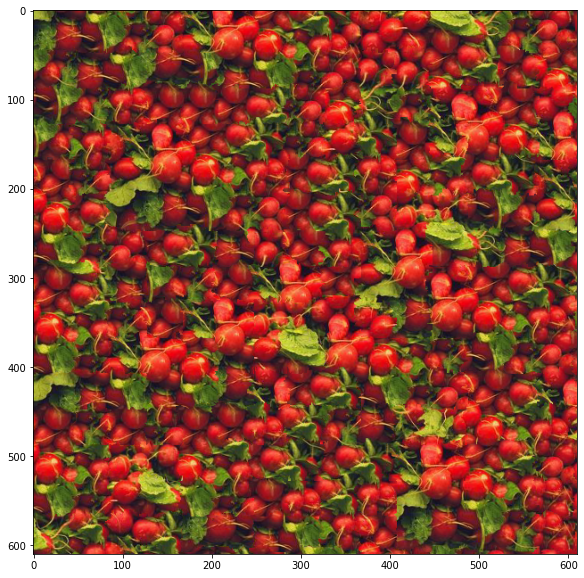

In [78]:
proper_h1 = proper_w1 = (block_size-overlap_size)*num_blocks - (overlap_size*(num_blocks-1))
plt.figure(figsize=(10,10))
plt.imshow(output_img[0:proper_h1, 0:proper_w1, :]) 

In [60]:
img_1 = cv.cvtColor(second_img, cv.COLOR_BGR2RGB)/255.0
H, W = img_1.shape[:2]
H1 = W1 = num_blocks * (block_size - overlap_size)

In [61]:
texFunc = textureMain(img_1, block_size, overlap_size, num_blocks, H, W, H1, W1, tolerance_factor)
texFunc.generateOutputMask()
output_img = texFunc.createTexture()

Progress= 0
Progress= 1
Progress= 2
Progress= 3
Progress= 4
Progress= 5
Progress= 6
Progress= 7
Progress= 8
Progress= 9
Progress= 10
Progress= 11
Progress= 12
Progress= 13
Progress= 14
Progress= 15
Progress= 16
Progress= 17
Progress= 18
Progress= 19


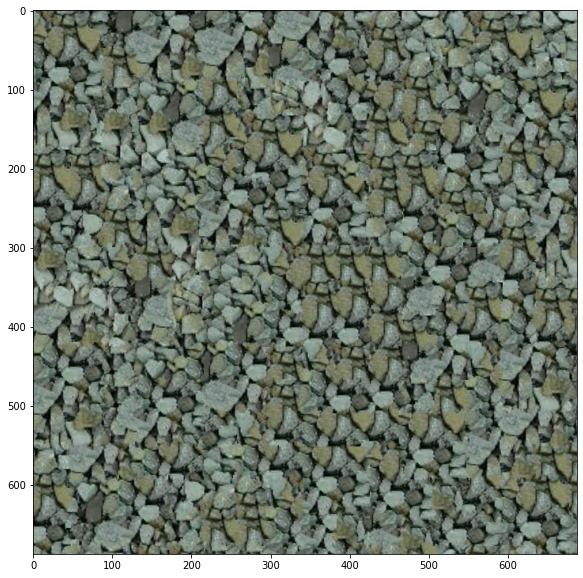

In [62]:
proper_h1 = proper_w1 = (block_size-overlap_size)*num_blocks - (overlap_size*(num_blocks-1))
plt.figure(figsize=(10,10))
plt.imshow(output_img[0:proper_h1, 0:proper_w1, :])

In [63]:
img_1 = cv.cvtColor(third_img, cv.COLOR_BGR2RGB)/255.0
H, W = img_1.shape[:2]
H1 = W1 = num_blocks * (block_size - overlap_size)
texFunc = textureMain(img_1, block_size, overlap_size, num_blocks, H, W, H1, W1, tolerance_factor)
texFunc.generateOutputMask()
output_img = texFunc.createTexture()

Progress= 0
Progress= 1
Progress= 2
Progress= 3
Progress= 4
Progress= 5
Progress= 6
Progress= 7
Progress= 8
Progress= 9
Progress= 10
Progress= 11
Progress= 12
Progress= 13
Progress= 14
Progress= 15
Progress= 16
Progress= 17
Progress= 18
Progress= 19


Again the result of applying texture synthesis method on third image 

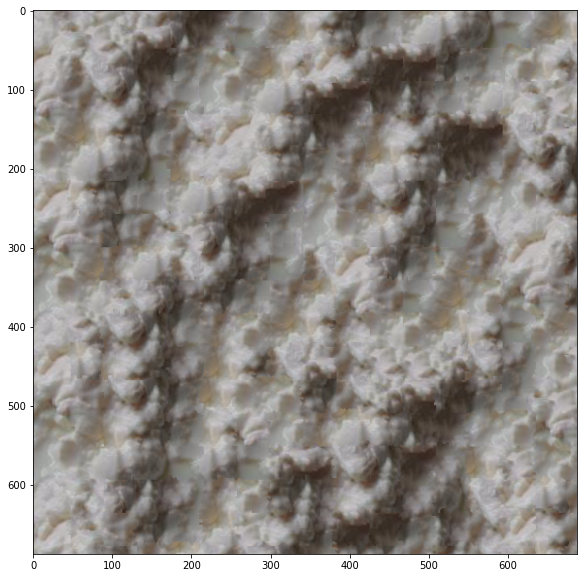

In [64]:
proper_h1 = proper_w1 = (block_size-overlap_size)*num_blocks - (overlap_size*(num_blocks-1))
plt.figure(figsize=(10,10))
plt.imshow(output_img[0:proper_h1, 0:proper_w1, :])

In [65]:
img_1 = cv.cvtColor(forth_img, cv.COLOR_BGR2RGB)/255.0
H, W = img_1.shape[:2]
H1 = W1 = num_blocks * (block_size - overlap_size)
texFunc = textureMain(img_1, block_size, overlap_size, num_blocks, H, W, H1, W1, tolerance_factor)
texFunc.generateOutputMask()
output_img = texFunc.createTexture()

Progress= 0
Progress= 1
Progress= 2
Progress= 3
Progress= 4
Progress= 5
Progress= 6
Progress= 7
Progress= 8
Progress= 9
Progress= 10
Progress= 11
Progress= 12
Progress= 13
Progress= 14
Progress= 15
Progress= 16
Progress= 17
Progress= 18
Progress= 19


The result of applying same texture synthesis suntion on forth image 

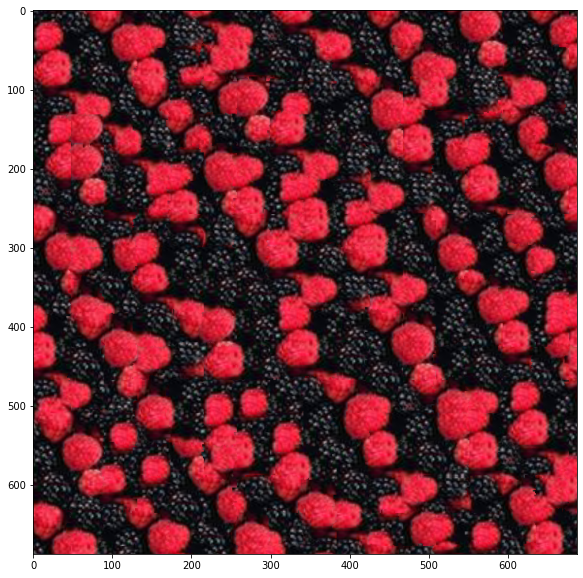

In [66]:
proper_h1 = proper_w1 = (block_size-overlap_size)*num_blocks - (overlap_size*(num_blocks-1))
plt.figure(figsize=(10,10))
plt.imshow(output_img[0:proper_h1, 0:proper_w1, :])